# Pymaceuticals Inc.
---

### Analysis

- Drug Regimen Capomulin has highest mice at 230 and Propiva at the lowest. Female mice are at 125 and Male at 124

- Due to positive correlatio of 0.84 for Capomulin Regimen, the increase in mouse weight also sees an increase in the average tumor volume


 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scs
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_df = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
Combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
mice_count = Combined_df["Mouse ID"].value_counts()
number_of_mice = len(mice_count)
number_of_mice

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = Combined_df[Combined_df.duplicated(['Mouse ID','Timepoint',])]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_id=duplicate_mice_df["Mouse ID"].unique()
duplicate_mouse_id=duplicate_mouse_id[0]


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Combined_df.drop(Combined_df[Combined_df['Mouse ID']== duplicate_mouse_id].index, inplace=True)


In [24]:
# Checking the number of mice in the clean DataFrame.

len(Combined_df['Mouse ID'].unique())

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Regimen = Combined_df.groupby('Drug Regimen')

mean_tumor_volume = Regimen['Tumor Volume (mm3)'].mean()

median_tumor_volume = Regimen['Tumor Volume (mm3)'].median()

drugs = Combined_df['Drug Regimen'].unique()
drugs

variance = []
st_dv = []
std_err = []

for drug in drugs:
    specific_drug = Combined_df[Combined_df['Drug Regimen']== drug]
    variance.append(scs.tvar(specific_drug['Tumor Volume (mm3)']))
    st_dv.append(scs.tstd(specific_drug['Tumor Volume (mm3)']))
    std_err.append(scs.sem(specific_drug['Tumor Volume (mm3)']))

# Assemble the resulting series into a single summary DataFrame.

summary_df =pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume
                         , "Median Tuor Volume": median_tumor_volume
                         , "Tumor Volume Variance": variance
                         , "Tumor Volume Std. Dev.": st_dv
                         , "Tumor Volume Std. Err": std_err})
summary_df



,Mean Tumor Volume,Median Tuor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,23.486704,4.846308,0.320955
Ceftamin,52.591172,51.776157,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,39.290177,6.268188,0.469821
Placebo,54.033581,52.288934,59.450562,7.710419,0.573111
Propriva,52.320930,50.446266,48.533355,6.966589,0.516398
Ramicane,40.216745,40.673236,68.553577,8.279709,0.603860
Stelasyn,54.233149,52.431737,43.852013,6.622085,0.544332


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

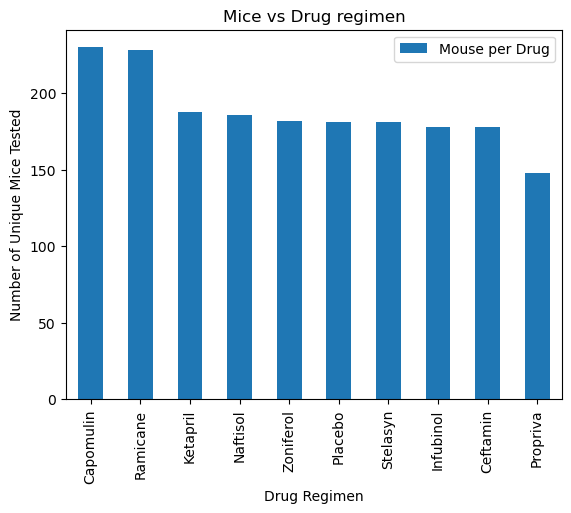

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# List of mouse per regimen
mouse_per_drugs = []

# Count of mouse studied per treatment
for drug in drugs:
    mouse_per_drugs.append(Combined_df[Combined_df['Drug Regimen'] == drug]['Mouse ID'].count())

# Combine data to DataFrame and sort it
mouse_vs_drugs_df = pd.DataFrame({'Drugs': drugs, 'Mouse per Drug': mouse_per_drugs}, index=drugs)
mouse_vs_drugs_df= mouse_vs_drugs_df.sort_values(by='Mouse per Drug', ascending=False)


bar_plot = mouse_vs_drugs_df.plot.bar()
bar_plot.set(xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested', title='Mice vs Drug regimen')
plt.show()

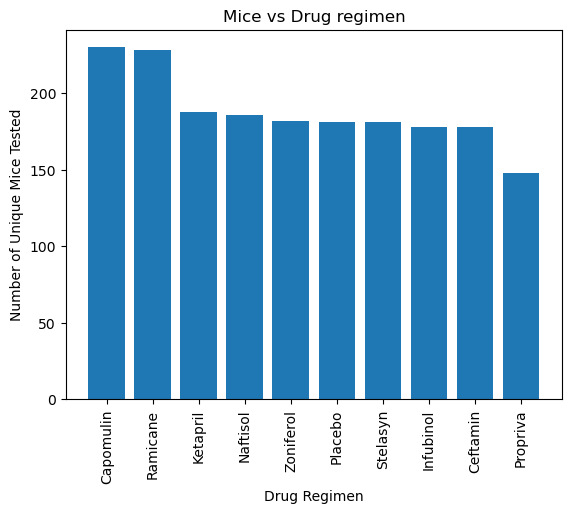

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(mouse_vs_drugs_df['Drugs'], mouse_vs_drugs_df['Mouse per Drug'])
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.title('Mice vs Drug regimen')
plt.show()

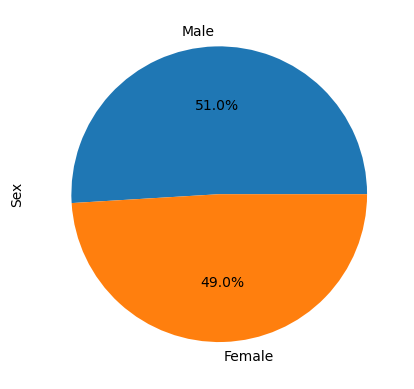

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = Combined_df['Sex'].value_counts()

pie_plot = sex.plot.pie(y="Sex", autopct='%1.1f%%', startangle=0)
plt.show()

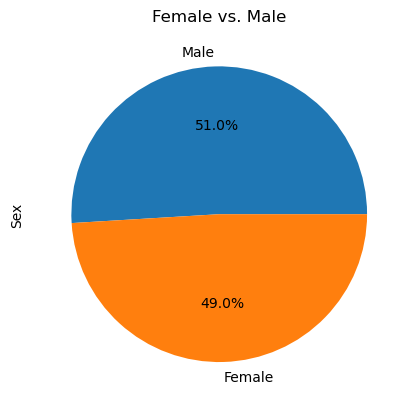

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = ['Male', 'Female']
plt.pie(sex, labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title("Female vs. Male")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_volume_df = Combined_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_volume_df = final_tumor_volume_df.sort_values(['Mouse ID', 'Timepoint'])
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatment_regimen)]


# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = final_tumor_volume_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_tumor_volume_df = final_tumor_volume_df.merge(max_timepoint_df, on=['Mouse ID', 'Timepoint'])
max_tumor_volume_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drug in treatment_regimen:
    tumor_volume_by_drug = max_tumor_volume_df[max_tumor_volume_df['Drug Regimen'] == drug]    
    tumor_volume_by_drug = tumor_volume_by_drug['Tumor Volume (mm3)']
    
    quartiles = tumor_volume_by_drug.quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    
    iqr = q3 - q1
    iqr_1_5 = iqr * 1.5
    
    
    q1_bound = q1 - iqr_1_5
    q3_bound = q3 + iqr_1_5
    outliers = [q1_bound, q3_bound]
    
    potential_outliers = []
    for value in tumor_volume_by_drug:
        if value < q1_bound or value > q3_bound:
            potential_outliers.append(value)
    
    print(f"{drug}'s potential outliers: {potential_outliers}")
    

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


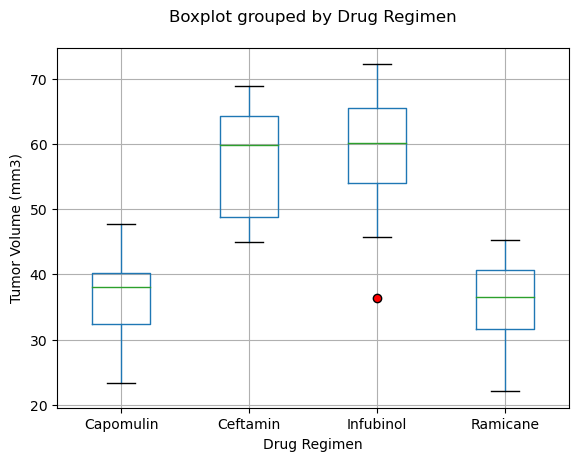

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='red')
max_tumor_volume_df.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', flierprops=flierprops)
plt.title('')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

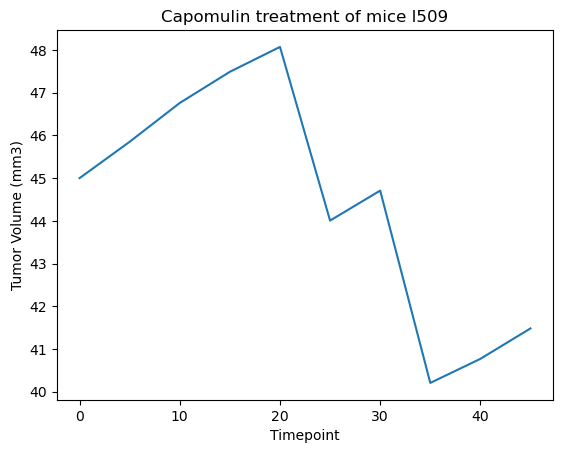

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

treated_mouses = Combined_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
treated_mouses = treated_mouses[treated_mouses['Drug Regimen'] == 'Capomulin']
treated_mice = treated_mouses[treated_mouses['Mouse ID'] == 'l509']

plt.plot(treated_mice['Timepoint'], treated_mice['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mice l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


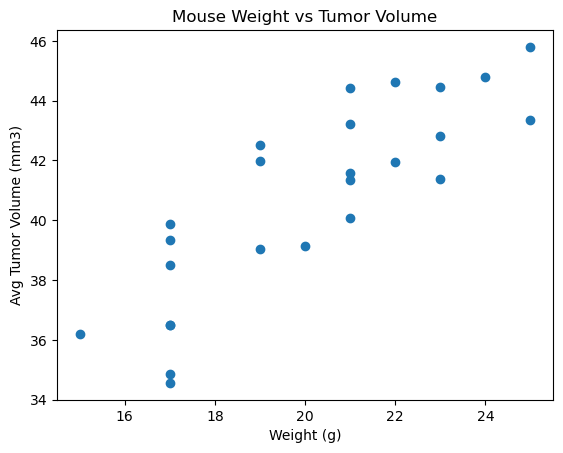

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight = Combined_df[['Mouse ID', 'Weight (g)']]
treated_mouses = treated_mouses.merge(mouse_weight, on='Mouse ID')

avg_tumor_volume = treated_mouses.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
treated_mouses['Weight (g)']
weight = treated_mouses.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(weight, avg_tumor_volume)
plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation

correlation = scs.pearsonr(weight,avg_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {correlation[0]}')


The correlation between mouse weight and the average tumor volume is 0.8419363424694721


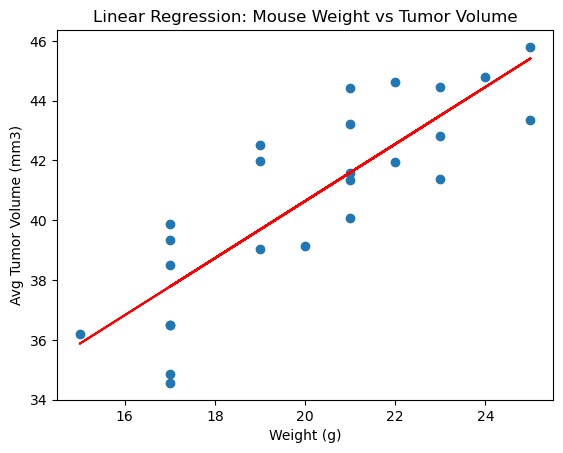

In [44]:
# Linear Regression


mt_slope, mt_int, mt_r, mt_p, mt_std_err = scs.linregress(weight,avg_tumor_volume)
mt_fit = mt_slope * weight + mt_int

plt.scatter(weight,avg_tumor_volume)
plt.plot(weight,mt_fit,"-", color='red')
plt.title('Linear Regression: Mouse Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()
plt.show()